# Premier League Prediction

## Overview

Soccer gambling is rising in popularity. One of the most popular leagues in the world is the Premier League. A very common form of soccer gambling is betting on the final results of the table. We will create a simulation model to help calculate the probabilties for each team finishing in different spots on the table. 

## Data Understanding


This data comes from sofascore.com. The data collected is from the years 2009-2020. Each year seperated into it's own dataset.The raw data started off in txt form. I first had to turn the data in txt form into csv. This turns the raw data folder into the cleaned data folder. You can see this process in the Create Data file under the ParseRawData class. The cleaned data has 8 columns. This is an example of what that data from the 2015-2016 season looks like.

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [5]:
clean_data = pd.read_csv('clean_data/1516.csv')
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  380 non-null    int64 
 1   Date        380 non-null    object
 2   Weekday     380 non-null    object
 3   HomeTeam    380 non-null    object
 4   HomeScore   380 non-null    int64 
 5   AwayScore   380 non-null    int64 
 6   AwayTeam    380 non-null    object
 7   Winner      380 non-null    object
 8   Stadium     380 non-null    object
 9   City        380 non-null    object
dtypes: int64(3), object(7)
memory usage: 29.8+ KB


The next step was to create my own columns using this data. This can be seen in the Create Data file with the MakeTeamData Class. I turned the clean data into team data with the new columns I created, I created 28 unique columns. All of these columns were created using the columns from the clean data. This is an example of what the team data from the year 2015 to 2016 looks like with the team Liverpool.

In [12]:
def get_df_team(team, season_start='1011', season_end='1718'):
    df_seasons = []
    
    nseason = int(season_end[:2]) - int(season_start[:2]) + 1
    
    for iseason in range(nseason):
        #season = f'{1011 + 101*iseason}'
        season = f'{int(season_start[:2])+iseason:02d}{int(season_start[2:])+iseason:02d}'
        try:
            df_iseason = pd.read_csv(f'team_data/{season}/{team}.csv')
            df_iseason.insert(0, 'Season', season)
            df_seasons.append(df_iseason)
            #df_seasons.append(pd.read_csv(f'team_data/{season}/{team}.csv'))
        except FileNotFoundError:
            continue
        
    if df_seasons == []:
        raise ValueError("Empty (Wrong name of team?)")
    else:
        df_seasons = pd.concat(df_seasons)
        df_seasons = df_seasons.reset_index(drop=True)
        return df_seasons

In [13]:
df = get_df_team('Liverpool')
print(df.loc[0, 'Date'], 'to', df.loc[len(df)-1, 'Date'])
print('df.shape =', df.shape)

df.head()


2010-08-15 to 2018-05-13
df.shape = (304, 55)


,Season,Date,Round,isHome,Rival,Goal,Conceded,Points,CumPoints,bCumPoints,...,bRivalHomeCumConceded,bRival5HomeMatchGoal,bRival5HomeMatchConceded,bRival5AwayMatchPoints,bRival5AwayMatchPointRatio,bRivalAwayCumGoal,bRivalAwayCumConceded,bRival5AwayMatchGoal,bRival5AwayMatchConceded,bRivalStdCumPoints
0,1011,2010-08-15,1,True,Arsenal,1,1,1,1,0,...,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN
1,1011,2010-08-24,2,False,Man City,0,3,0,1,1,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.246248
2,1011,2010-08-29,3,True,West Brom,1,0,3,4,1,...,NaN,NaN,NaN,0.0,0.0,0.0,6.0,0.0,6.0,0.177623
3,1011,2010-09-12,4,False,Birmingham,0,0,1,5,4,...,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.424965
4,1011,2010-09-19,5,False,Man Utd,2,3,0,5,5,...,0.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.031419


## Simulations

Finally, here are the simultations that I use to find the probabilities. First, I have a simulation for just one season. Second I have a simulation that simulates one season 200 times. 

importing Jupyter notebook from Modeling.ipynb
2010-08-15 to 2018-05-13
df.shape = (304, 55)
AIC =  1017.4666823857051

Iteration:  1
minimal dropped variable:  SelfDS
corresponding AIC:  1015.4697051880476
original AIC:  1017.4666823857051
drop or stop:  [Drop]

Iteration:  2
minimal dropped variable:  SelfAS
corresponding AIC:  1013.4882115833659
original AIC:  1015.4697051880476
drop or stop:  [Drop]

Iteration:  3
minimal dropped variable:  RivalDS
corresponding AIC:  1011.5420651925388
original AIC:  1013.4882115833659
drop or stop:  [Drop]

Iteration:  4
minimal dropped variable:  isDec
corresponding AIC:  1009.7313487368906
original AIC:  1011.5420651925388
drop or stop:  [Drop]

Iteration:  5
minimal dropped variable:  Round
corresponding AIC:  1007.8745680998599
original AIC:  1009.7313487368906
drop or stop:  [Drop]

Iteration:  6
minimal dropped variable:  bRival5MatchConceded
corresponding AIC:  1006.2112108144782
original AIC:  1007.8745680998599
drop or stop:  [Drop]

Ite

C:\Users\Derek\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_discrete_distns.py:596: RuntimeWarning: invalid value encountered in greater_equal
  return mu >= 0


===== use is_win_predict_sep =====
----------------------------------
********* confuse matrix *********
Obs           Win      Draw      Loss
Predict                              
Win      0.281081  0.089189  0.075676
Draw     0.151351  0.067568  0.129730
Loss     0.045946  0.029730  0.129730

*********** indicator ************
Accuracy   -       0.478378
Precision  Win     0.630303
           Draw    0.193798
           Loss    0.631579
Recall     Win     0.587571
           Draw    0.362319
           Loss    0.387097
F1 Score   Win     0.608187
           Draw    0.252525
           Loss    0.480000
dtype: float64


===== use is_win_predict_jnt =====
----------------------------------
********* confuse matrix *********
Obs           Win      Draw      Loss
Predict                              
Win      0.316216  0.100000  0.083784
Draw     0.083784  0.040541  0.081081
Loss     0.078378  0.045946  0.170270

*********** indicator ************
Accuracy   -       0.527027
Precision  Wi

C:\Users\Derek\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_discrete_distns.py:596: RuntimeWarning: invalid value encountered in greater_equal
  return mu >= 0


0.15000000000000002


C:\Users\Derek\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_discrete_distns.py:596: RuntimeWarning: invalid value encountered in greater_equal
  return mu >= 0


0.25000000000000006


C:\Users\Derek\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_discrete_distns.py:596: RuntimeWarning: invalid value encountered in greater_equal
  return mu >= 0


0.35000000000000003


C:\Users\Derek\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_discrete_distns.py:596: RuntimeWarning: invalid value encountered in greater_equal
  return mu >= 0


0.45000000000000007


C:\Users\Derek\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_discrete_distns.py:596: RuntimeWarning: invalid value encountered in greater_equal
  return mu >= 0


0.5500000000000002


C:\Users\Derek\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_discrete_distns.py:596: RuntimeWarning: invalid value encountered in greater_equal
  return mu >= 0


0.6500000000000001


C:\Users\Derek\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_discrete_distns.py:596: RuntimeWarning: invalid value encountered in greater_equal
  return mu >= 0


0.7500000000000002


C:\Users\Derek\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_discrete_distns.py:596: RuntimeWarning: invalid value encountered in greater_equal
  return mu >= 0


0.8500000000000002


C:\Users\Derek\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_discrete_distns.py:596: RuntimeWarning: invalid value encountered in greater_equal
  return mu >= 0


0.9500000000000002


C:\Users\Derek\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_discrete_distns.py:596: RuntimeWarning: invalid value encountered in greater_equal
  return mu >= 0


380/380     2019-05-12        Brighton vs Man City       
0/200
380/380     2019-05-12        Brighton vs Man City       
1/200
380/380     2019-05-12        Brighton vs Man City       
2/200
380/380     2019-05-12        Brighton vs Man City       
3/200
380/380     2019-05-12        Brighton vs Man City       
4/200
380/380     2019-05-12        Brighton vs Man City       
5/200
380/380     2019-05-12        Brighton vs Man City       
6/200
380/380     2019-05-12        Brighton vs Man City       
7/200
380/380     2019-05-12        Brighton vs Man City       
8/200
380/380     2019-05-12        Brighton vs Man City       
9/200
380/380     2019-05-12        Brighton vs Man City       
10/200
380/380     2019-05-12        Brighton vs Man City       
11/200
380/380     2019-05-12        Brighton vs Man City       
12/200
380/380     2019-05-12        Brighton vs Man City       
13/200
380/380     2019-05-12        Brighton vs Man City       
14/200
380/380     2019-05-12        Brigh

380/380     2019-05-12        Brighton vs Man City       
125/200
380/380     2019-05-12        Brighton vs Man City       
126/200
380/380     2019-05-12        Brighton vs Man City       
127/200
380/380     2019-05-12        Brighton vs Man City       
128/200
380/380     2019-05-12        Brighton vs Man City       
129/200
380/380     2019-05-12        Brighton vs Man City       
130/200
380/380     2019-05-12        Brighton vs Man City       
131/200
380/380     2019-05-12        Brighton vs Man City       
132/200
380/380     2019-05-12        Brighton vs Man City       
133/200
380/380     2019-05-12        Brighton vs Man City       
134/200
380/380     2019-05-12        Brighton vs Man City       
135/200
380/380     2019-05-12        Brighton vs Man City       
136/200
380/380     2019-05-12        Brighton vs Man City       
137/200
380/380     2019-05-12        Brighton vs Man City       
138/200
380/380     2019-05-12        Brighton vs Man City       
139/200
380/380   

380/380     2019-05-12        Brighton vs Man City       
50/200
380/380     2019-05-12        Brighton vs Man City       
51/200
380/380     2019-05-12        Brighton vs Man City       
52/200
380/380     2019-05-12        Brighton vs Man City       
53/200
380/380     2019-05-12        Brighton vs Man City       
54/200
380/380     2019-05-12        Brighton vs Man City       
55/200
380/380     2019-05-12        Brighton vs Man City       
56/200
380/380     2019-05-12        Brighton vs Man City       
57/200
380/380     2019-05-12        Brighton vs Man City       
58/200
380/380     2019-05-12        Brighton vs Man City       
59/200
380/380     2019-05-12        Brighton vs Man City       
60/200
380/380     2019-05-12        Brighton vs Man City       
61/200
380/380     2019-05-12        Brighton vs Man City       
62/200
380/380     2019-05-12        Brighton vs Man City       
63/200
380/380     2019-05-12        Brighton vs Man City       
64/200
380/380     2019-05-12   

380/380     2019-05-12        Brighton vs Man City       
175/200
380/380     2019-05-12        Brighton vs Man City       
176/200
380/380     2019-05-12        Brighton vs Man City       
177/200
380/380     2019-05-12        Brighton vs Man City       
178/200
380/380     2019-05-12        Brighton vs Man City       
179/200
380/380     2019-05-12        Brighton vs Man City       
180/200
380/380     2019-05-12        Brighton vs Man City       
181/200
380/380     2019-05-12        Brighton vs Man City       
182/200
380/380     2019-05-12        Brighton vs Man City       
183/200
380/380     2019-05-12        Brighton vs Man City       
184/200
380/380     2019-05-12        Brighton vs Man City       
185/200
380/380     2019-05-12        Brighton vs Man City       
186/200
380/380     2019-05-12        Brighton vs Man City       
187/200
380/380     2019-05-12        Brighton vs Man City       
188/200
380/380     2019-05-12        Brighton vs Man City       
189/200
380/380   

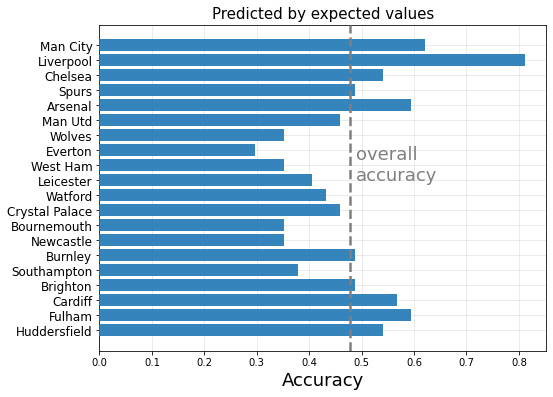

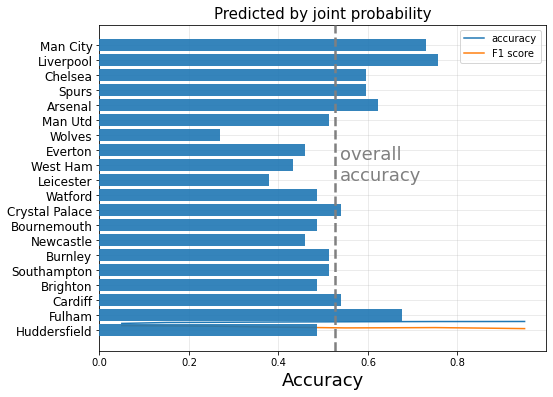

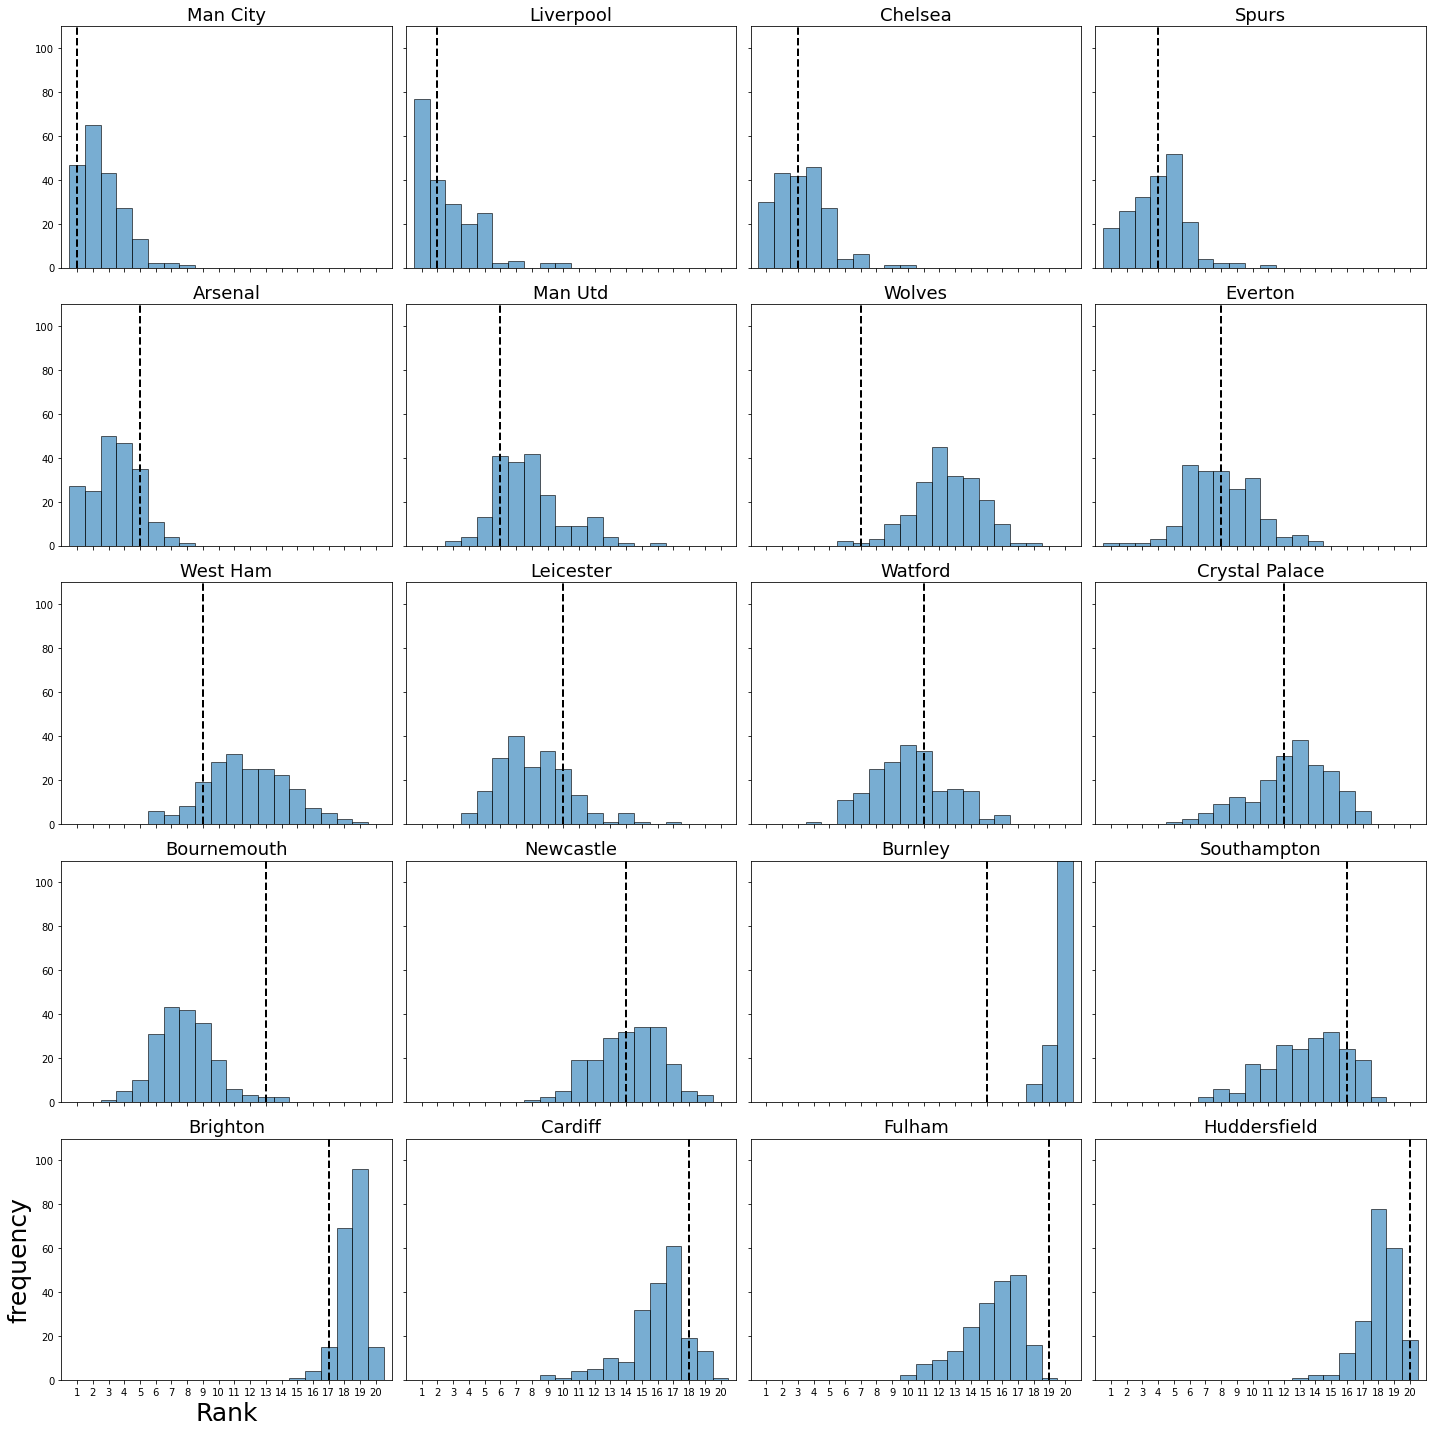

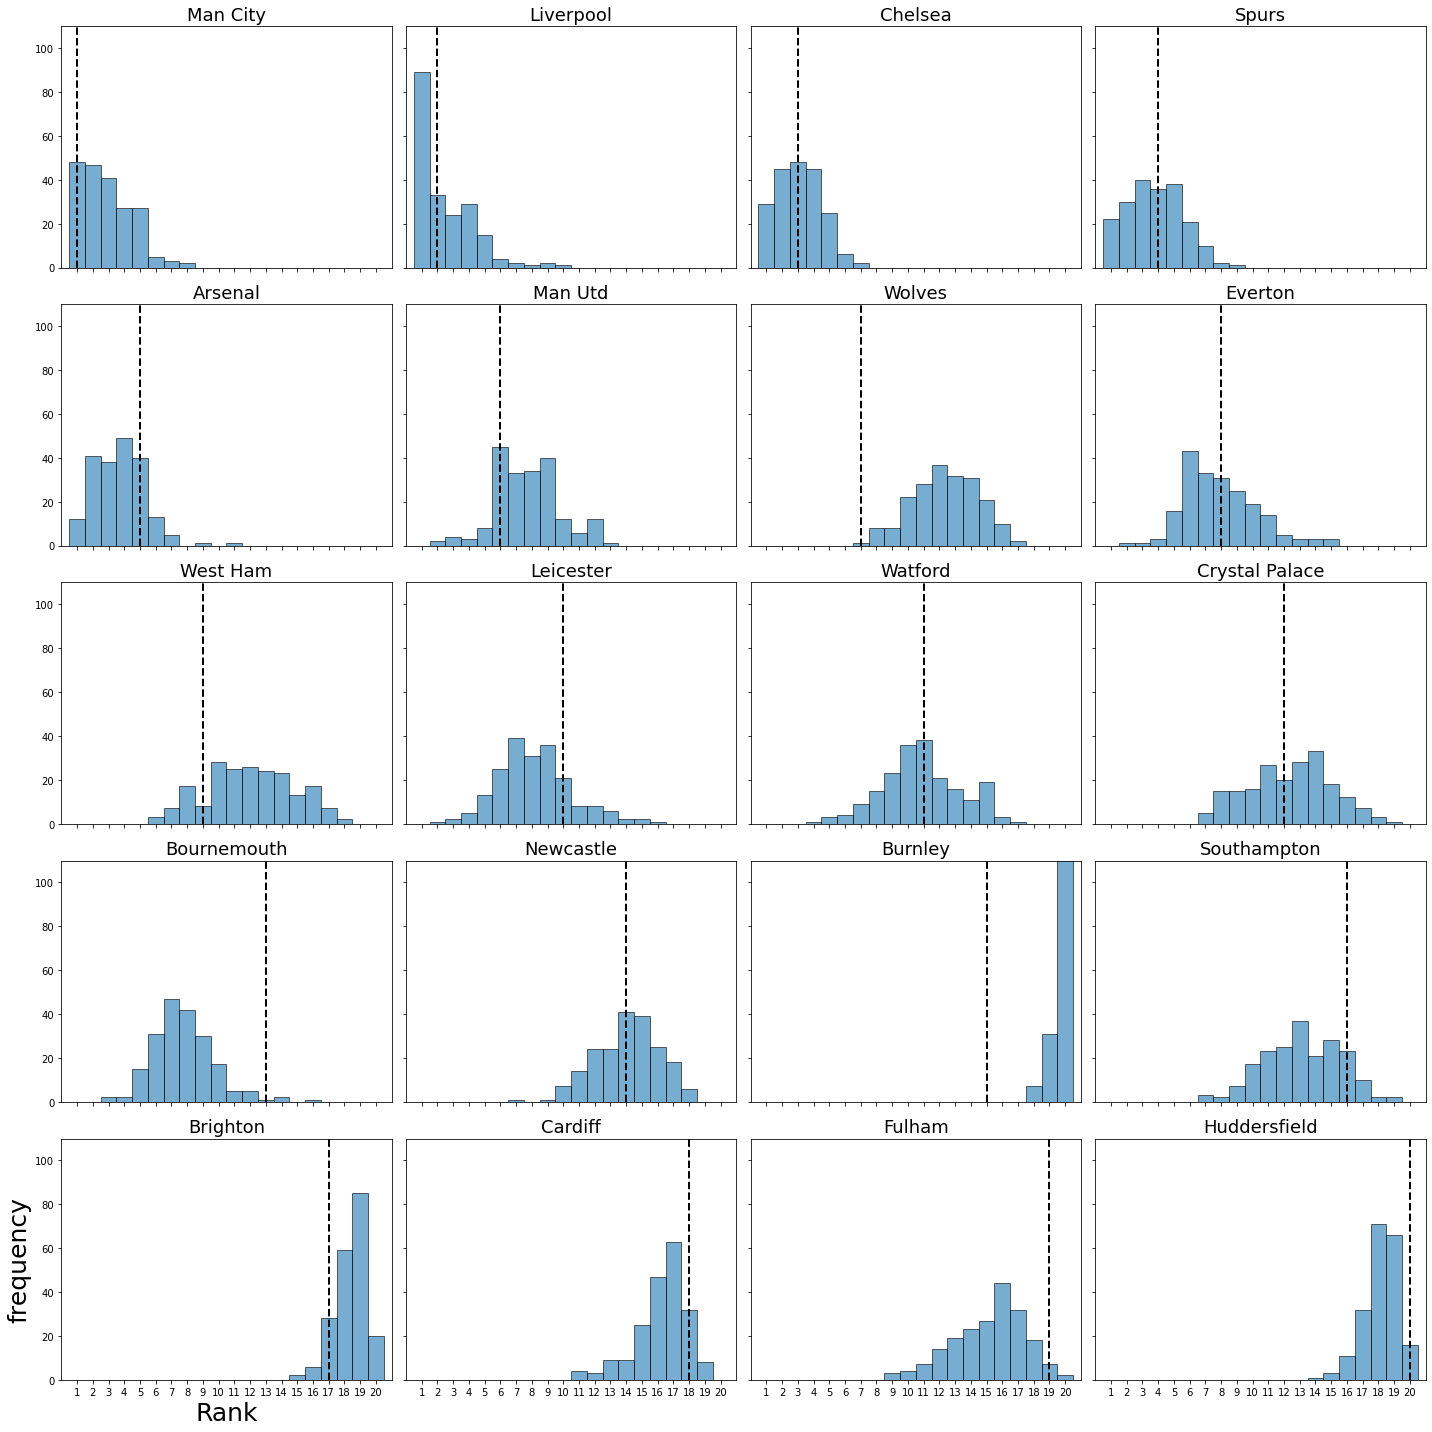

In [7]:

import import_ipynb
import Modeling

To compare the results from the simulations I have created this plot. The Y axis is the frequency, the X axis the place on the table. The line down the middle of the graph indicates where they had actually finished during the 2018-2019 season. You can compare this to the distirubtion of results from the simulations. 

# Conclusion


This simulation has it's shortcomings. It is not very accurate when it comes to predicting a singular game. This is because there are many factors that can effect the outcome of a game that are not included in this data. Also, you can see that the predictions can lean fairly heavily in one direction. Burnley was predicted to come in last place almost everytime, yet they finshed in 15th. However, most of the teams finished with a couple deviations of where they were predicted to be. The model is a good baseline if you're looking to make a generalized prediction before the year starts. The odds for table predictions change drastically throughout the year. This model would be good to generate those initial odds before the season begins when you don't have data from the current season yet. 